In [ ]:
%load_ext autoreload
%autoreload 2

# Neural Net Foundations

> mathematical foundations of deep learning: Stochastic gradient descent (SGD), and the flexibility of linear functions layered with non-linear activation functions. 

In [ ]:
#| default_exp neuralnet

## Initial Checks

In [ ]:
#|eval: false
!conda list | grep "pytorch"

ffmpeg                    4.3                  hf484d3e_0    pytorch
pytorch                   2.0.1           py3.11_cuda11.8_cudnn8.7.0_0    pytorch
pytorch-cuda              11.8                 h7e8668a_5    pytorch
pytorch-ignite            0.4.12                   pypi_0    pypi
pytorch-lightning         2.0.6                    pypi_0    pypi
pytorch-mutex             1.0                        cuda    pytorch
torchaudio                2.0.2               py311_cu118    pytorch
torchtriton               2.0.0                     py311    pytorch
torchvision               0.15.2              py311_cu118    pytorch


In [ ]:
#|eval: false
!pip list | grep "fastai" 
!pip list | grep "fastbook"
!pip list | grep "ipywidgets"
!pip list | grep "fastAIcourse"

fastai                        2.7.12
fastbook                      0.0.29
ipywidgets                    7.7.5
fastAIcourse                  0.0.1     /home/ben/BENEDICT_Only/Benedict_Projects/Benedict_ML/fastAIcourse


In [ ]:
#|eval: false
import torch

In [ ]:
#|eval: false
torch.cuda.is_available()

True

## Gather Data

In [ ]:
#|eval: false
from fastbook import search_images_ddg
from fastdownload import download_url
from fastai.vision.all import *
import os

In [ ]:
#|eval: false
from fastAIcourse.functions import *

In [ ]:
#|eval: false
?functions


Object `functions` not found.


Image file exists.


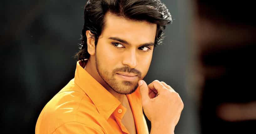

In [ ]:
#|eval: false
download_pic('indian actor close up',
             name = 'indian', 
             folder = './Data/actors_test', 
             n_images = 10)

In [ ]:
#|eval: false
file_path = "./Data/countries.txt"
searches = read_from_file(file_path)
print(searches)

('India', 'China', 'United States', 'Indonesia', 'Pakistan', 'Nigeria', 'Brazil', 'Bangladesh', 'Russia', 'Japan')


In [ ]:
#|code-fold: true
#|eval: false
path = Path('Data/actors')

create_data_folder(folder_path = path,
                   searches = searches,
                   before = 'Famous ',
                   after = ' actor close up',
                   amount = 400,
                   recreate = False
                  )

Folder already exists: Data/actors


## Design Model

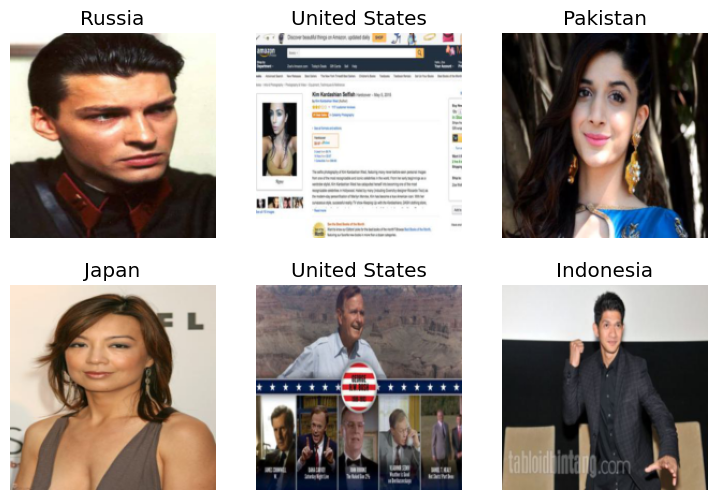

In [ ]:
#|eval: false
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

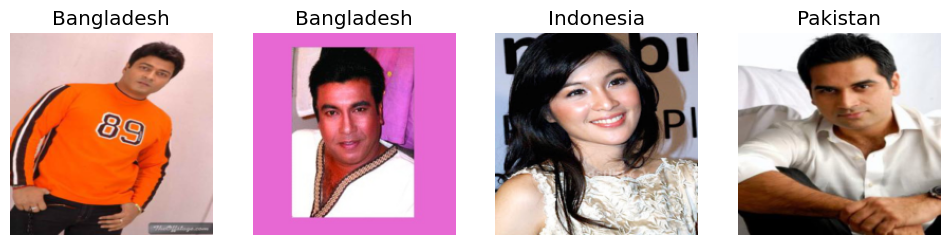

In [ ]:
#|eval: false
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
#|eval: false
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

/home/ben/mambaforge/envs/fast/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ben/mambaforge/envs/fast/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,3.061026,2.202331,0.668797,00:12


/home/ben/mambaforge/envs/fast/lib/python3.11/site-packages/torch/nn/modules/conv.py:459: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1682343995622/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


epoch,train_loss,valid_loss,error_rate,time
0,2.037660,1.944270,0.597444,00:10
1,1.571851,1.946201,0.562300,00:10
2,1.091523,1.944521,0.552716,00:10
3,0.699983,1.902180,0.532481,00:10
4,0.459072,1.913604,0.535676,00:10


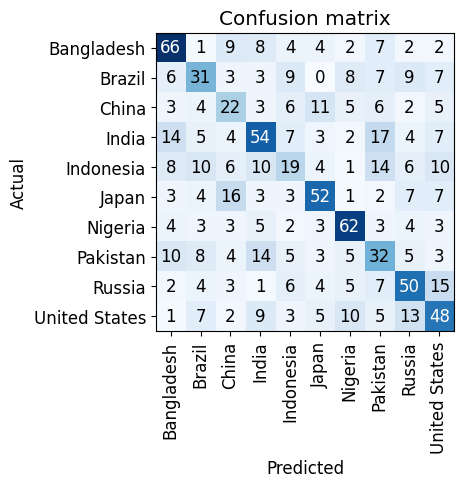

In [ ]:
#|eval: false
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

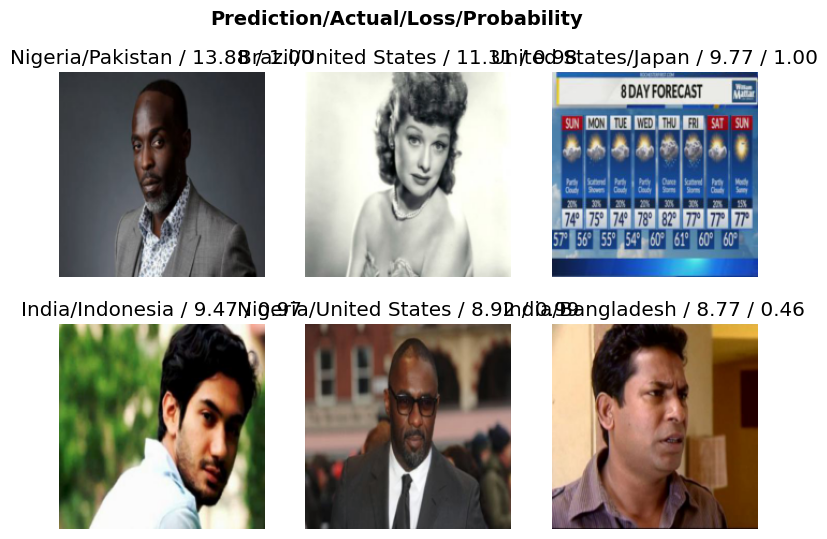

In [ ]:
#|eval: false
interp.plot_top_losses(6, nrows=2)

## Testing

{'Bangladesh': 0.58481, 'Brazil': 4.16196, 'China': 0.11451, 'India': 70.30992, 'Indonesia': 0.00541, 'Japan': 0.79125, 'Nigeria': 2.00672, 'Pakistan': 0.33718, 'Russia': 0.3638, 'United States': 21.32445}


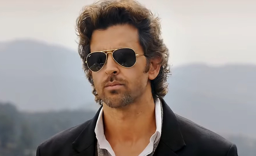

In [ ]:
#|eval: false
image= f'./Data/actors_test/indian{8}.jpg'

print(classify_images(learn, image))
Image.open(image).to_thumb(256,256)

## New models

In [ ]:
#|eval: false
!pip list | grep 'timm'

timm                          0.9.2


In [ ]:
#|eval: false
import timm 

In [ ]:
#|eval: false
timm.list_models('convnext*')[0:5]


['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols']

In [ ]:
#|eval: false
timm.list_models('resnet1*')[0:5]

['resnet10t', 'resnet14t', 'resnet18', 'resnet18d', 'resnet101']

In [ ]:
#|eval: false
learn1 = vision_learner(dls, 'resnet26', metrics=error_rate).to_fp16()
learn1.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.881004,2.429698,0.620873,00:09


epoch,train_loss,valid_loss,error_rate,time
0,1.449006,1.923702,0.547391,00:10
1,1.212832,1.975072,0.555911,00:10
2,0.915473,1.906770,0.522897,00:10
3,0.658436,1.909738,0.522897,00:10
4,0.472457,1.905135,0.520767,00:10


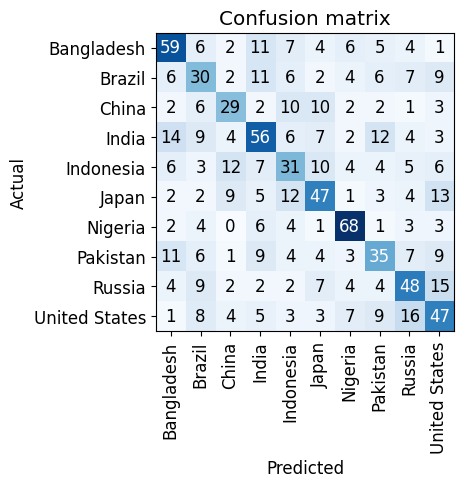

In [ ]:
#|eval: false
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()

{'Bangladesh': 9.80539, 'Brazil': 1.49894, 'China': 0.29037, 'India': 38.40419, 'Indonesia': 0.22329, 'Japan': 0.46356, 'Nigeria': 44.20296, 'Pakistan': 0.23955, 'Russia': 1.59056, 'United States': 3.28119}


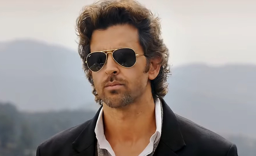

In [ ]:
#|eval: false
print(classify_images(learn1, image))
Image.open(image).to_thumb(256,256)

In [ ]:
#|eval: false
learn2 = vision_learner(dls, 'resnetv2_50', metrics=error_rate).to_fp16()
learn2.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,3.205828,2.137947,0.658147,00:11


epoch,train_loss,valid_loss,error_rate,time
0,1.647452,2.112619,0.652822,00:13
1,1.484411,2.201303,0.613419,00:13
2,1.218318,2.077614,0.607029,00:13
3,0.935955,2.057820,0.579340,00:13
4,0.753766,2.046380,0.572950,00:13


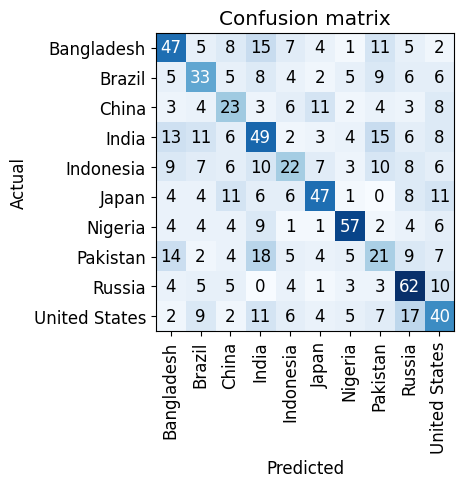

In [ ]:
#|eval: false
interp = ClassificationInterpretation.from_learner(learn2)
interp.plot_confusion_matrix()

{'Bangladesh': 0.27228, 'Brazil': 76.53563, 'China': 0.01091, 'India': 10.21732, 'Indonesia': 0.16758, 'Japan': 0.02301, 'Nigeria': 10.41884, 'Pakistan': 0.19214, 'Russia': 0.49352, 'United States': 1.66875}


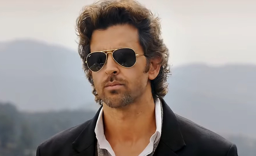

In [ ]:
#|eval: false
print(classify_images(learn2, image))
Image.open(image).to_thumb(256,256)

In [ ]:
#|eval: false
learn3 = vision_learner(dls, 'convnextv2_tiny', metrics=error_rate).to_fp16()
learn3.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.990005,1.755664,0.543131,00:25
1,2.091542,1.487324,0.452609,00:21
2,1.508252,1.416638,0.432375,00:21
3,1.161027,1.406566,0.421725,00:21
4,0.940143,1.401650,0.421725,00:21


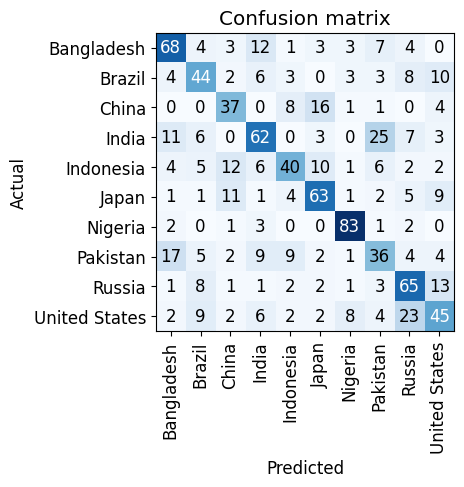

In [ ]:
#|eval: false
interp = ClassificationInterpretation.from_learner(learn3)
interp.plot_confusion_matrix()

{'Bangladesh': 0.23824, 'Brazil': 0.12116, 'China': 0.00174, 'India': 92.17273, 'Indonesia': 0.00627, 'Japan': 0.06793, 'Nigeria': 0.09636, 'Pakistan': 6.12713, 'Russia': 0.01266, 'United States': 1.15576}


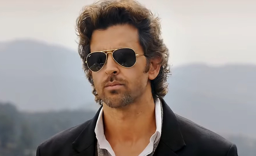

In [ ]:
#|eval: false
print(classify_images(learn3, image))
Image.open(image).to_thumb(256,256)

In [ ]:
#|eval: false
m = learn3.model
m

Sequential(
  (0): TimmBody(
    (model): ConvNeXt(
      (stem): Sequential(
        (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
      )
      (stages): Sequential(
        (0): ConvNeXtStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (norm): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
              (mlp): GlobalResponseNormMlp(
                (fc1): Linear(in_features=96, out_features=384, bias=True)
                (act): GELU()
                (drop1): Dropout(p=0.0, inplace=False)
                (grn): GlobalResponseNorm()
                (fc2): Linear(in_features=384, out_features=96, bias=True)
                (drop2): Dropout(p=0.0, inplace=False)
              )
              (shortcut): Identity()
              (drop_p

In [ ]:
#|eval: false
l = m.get_submodule('0.model.stem.1')
list(l.parameters())

[Parameter containing:
 tensor([ 4.9245e+00, -8.1645e-03,  1.1290e+00,  3.5585e-01,  1.8599e-01,  4.6955e-01,  4.3790e-03,  1.9170e+00,  3.0219e+00,  1.5570e+00,  5.8096e-01,  2.7789e-03,  3.3858e+00,  1.2309e+00,
         -1.4897e-02,  2.1202e+00,  1.7301e+00,  7.7809e-01,  2.3377e+00,  3.1572e+00,  1.6847e+00,  1.3231e+00,  3.6778e-01,  2.2078e+00,  1.7457e-01,  1.5690e-01,  1.8200e+00, -1.5067e-02,
          2.3761e+00,  3.6645e+00,  4.0027e-01,  2.0611e-02,  3.6515e-01,  1.2036e+00,  7.3727e-01,  2.6863e-01,  2.4101e+00,  3.0849e-01,  7.1917e-01,  6.2652e-01,  7.7604e-01,  9.9957e-03,
          2.9930e-01,  5.4365e-01,  8.0761e-01,  3.4452e-01,  8.0076e-01,  5.9819e-01,  1.9604e-01,  3.4446e-01,  2.2306e+00,  1.3427e-02,  1.1659e+00, -6.9046e-03,  3.2349e+00,  5.7925e-01,
          2.1726e-01,  4.1839e+00,  2.9480e-01,  8.5265e-01,  7.0538e-04, -4.7446e-03,  6.6901e-01,  2.4099e-01,  1.2579e+00,  2.7430e-01,  6.4173e-01,  2.6435e-01,  4.6811e+00,  6.6453e-01,
         -2.1631e-03, 